In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import typing as tp


In [42]:
def f_ILYUSHKA_LOOOL(x, y):
    return x ** 2 + y ** 4 - 2 * y **  2

stationary_ILYUSHKA_LOOOL = [
                            {'coords': (0, 0), 'char': 'saddle'},
                            {'coords': (0, 1), 'char': 'min'},
                            {'coords': (0, -1), 'char': 'min'}
                             ]

def df_dx_ilyushka(x, y):
    return  x * 2

def df_dy_ilyushka(x, y):
    return 4 * y ** 3 - y * 4

In [43]:
f = f_ILYUSHKA_LOOOL
stationary = stationary_ILYUSHKA_LOOOL

df_dx = df_dx_ilyushka
df_dy = df_dy_ilyushka

In [4]:
def get_col_from_char(char: str) -> str:
    return {
        'saddle': 'purple',
        'min': 'blue',
        'max': 'red'
    }[char]

In [33]:
def draw_plot_f(X, Y, Z, points, mode: tp.Literal['plot', 'levels'] = 'plot'):
    ncols = 4 if mode == 'levels' else 3
    width = 20 if mode == 'levels' else 15
    
    fig = plt.figure(figsize=(width, 5))

    axes = []
    for i in range(3):
        axes.append(fig.add_subplot(1, ncols, i + 1, projection='3d'))

    views = [
        {'elev': 30, 'azim': 120},
        {'elev': -25, 'azim': 120},
        {'elev': 15, 'azim': 0}
    ]

    for i in range(3):
        ax = axes[i]
        view = views[i]
        ax.view_init(**view)
        
        if mode == 'plot':
            surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
            fig.colorbar(surf, ax=ax, shrink=0.5)
        elif mode == 'levels':
            ax.contour(X, Y, Z, levels=20, cmap='viridis')
            
        ax.set_title(f"View: elev={view['elev']}, azim={view['azim']}")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        for point in points:
            px, py = point['coords']
            pz = f(px, py)
            ax.scatter(px, py, pz, color=get_col_from_char(point['char']), s=50, label=point['char'], edgecolors='k')
        
        ax.legend()

    if mode == 'levels':
        ax2 = fig.add_subplot(1, ncols, 4)
        
        contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
        ax2.clabel(contour, inline=True, fontsize=8)
        
        ax2.set_title('2D Линии уровня')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.grid(True, alpha=0.3)

        for point in points:
            px, py = point['coords']
            ax2.scatter(px, py, color=get_col_from_char(point['char']), s=50, label=point['char'], edgecolors='k')
        
        ax2.legend()

    plt.tight_layout()
    plt.show()

In [23]:
x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

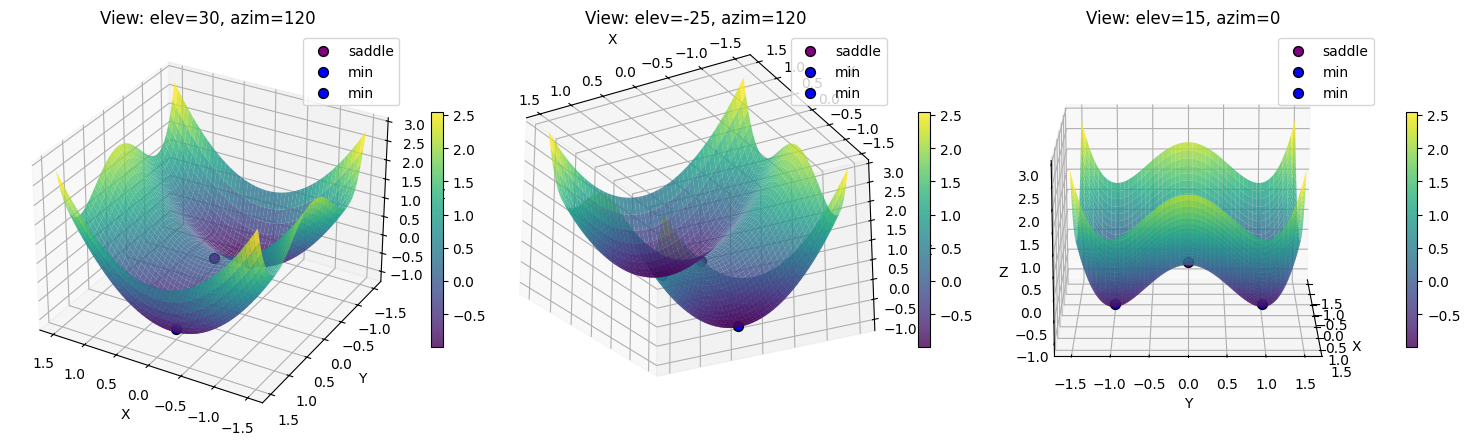

In [35]:
draw_plot_f(X, Y, Z, stationary, 'plot')

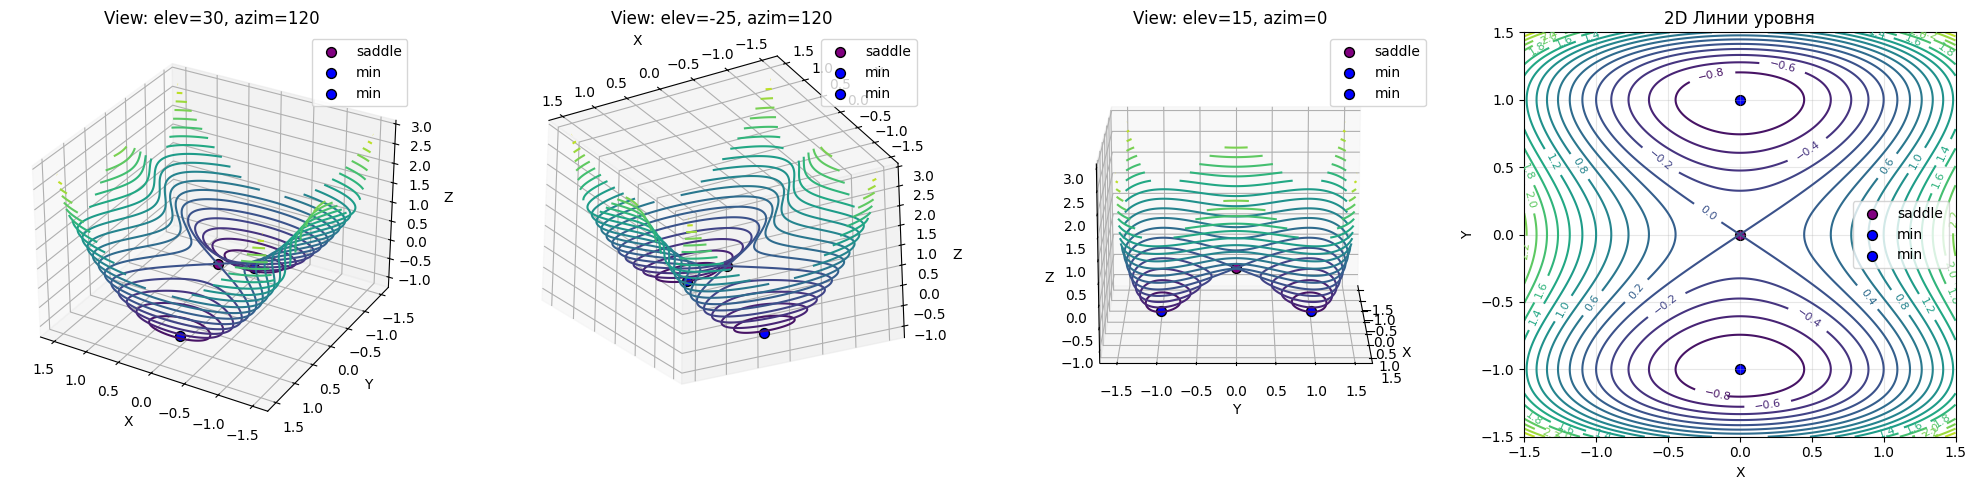

In [36]:
draw_plot_f(X, Y, Z, stationary, 'levels')

Покажем, что направление наискорейшего возрастания функции совпадает с направлением градиента, а убывания - с направлением антиградиента.

1. Рассмотрим производную функции $f(x, y)$ по направлению вектора $l$ в точке $M$. Пусть $l$ - единичный вектор ($|l| = 1$). Производная по направлению вычисляется через скалярное произведение градиента на этот вектор:
   $$ \frac{\partial f}{\partial l} = (\nabla f, l) $$

2. Раскроем скалярное произведение через косинус угла $\alpha$ между вектором градиента $\nabla f$ и вектором направления $l$:
   $$ \frac{\partial f}{\partial l} = |\nabla f| \cdot |l| \cdot \cos \alpha = |\nabla f| \cdot \cos \alpha$$

3. Величина $|\nabla f|$ фиксирована в точке $M$. Чтобы максимизировать $\frac{\partial f}{\partial l}$, нужно максимизировать $\cos \alpha$.
   Максимум $\cos \alpha = 1$ достигается при $\alpha = 0$.
   *Вывод:* Угол между направлением движения и градиентом равен 0. Движение происходит **по направлению градиента**.

4. Чтобы минимизировать $\frac{\partial f}{\partial l}$ (получить наибольшую скорость падения), нужно минимизировать $\cos \alpha$.
   Минимум $\cos \alpha = -1$ достигается при $\alpha = \pi$ ($180^\circ$).
   *Вывод:* Вектор движения направлен противоположно градиенту. Это направление **антиградиента** $(-\nabla f)$.


In [38]:
def visualize_gradient_field(X, Y, Z, U, V):
    """
    Визуализирует векторное поле градиента поверх линий уровня.
    
    Параметры:
    X, Y : np.ndarray - координатные сетки
    Z    : np.ndarray - значения функции f(X, Y)
    U, V : np.ndarray - компоненты градиента (df/dx, df/dy)
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    cf = ax.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    fig.colorbar(cf, ax=ax, label='Значение функции f(x, y)')

    c_lines = ax.contour(X, Y, Z, levels=20, colors='white', linewidths=0.5, alpha=0.7)
    ax.clabel(c_lines, inline=True, fontsize=8, fmt='%.1f')

    n_points = max(X.shape)
    step = 1
    if n_points > 30:
        step = n_points // 20
    
    X_q = X[::step, ::step]
    Y_q = Y[::step, ::step]
    U_q = U[::step, ::step]
    V_q = V[::step, ::step]

    Q = ax.quiver(X_q, Y_q, U_q, V_q, color='black', alpha=0.8,
                  angles='xy', scale_units='xy', scale=15,
                  width=0.004, headwidth=4)

    ax.quiverkey(Q, 0.9, 1.03, 1, r'$|\nabla f| = 1$', labelpos='E', coordinates='axes')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [44]:
x = np.linspace(-1.5, 1.5, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)
U = df_dx(X, Y)
V = df_dy(X, Y)

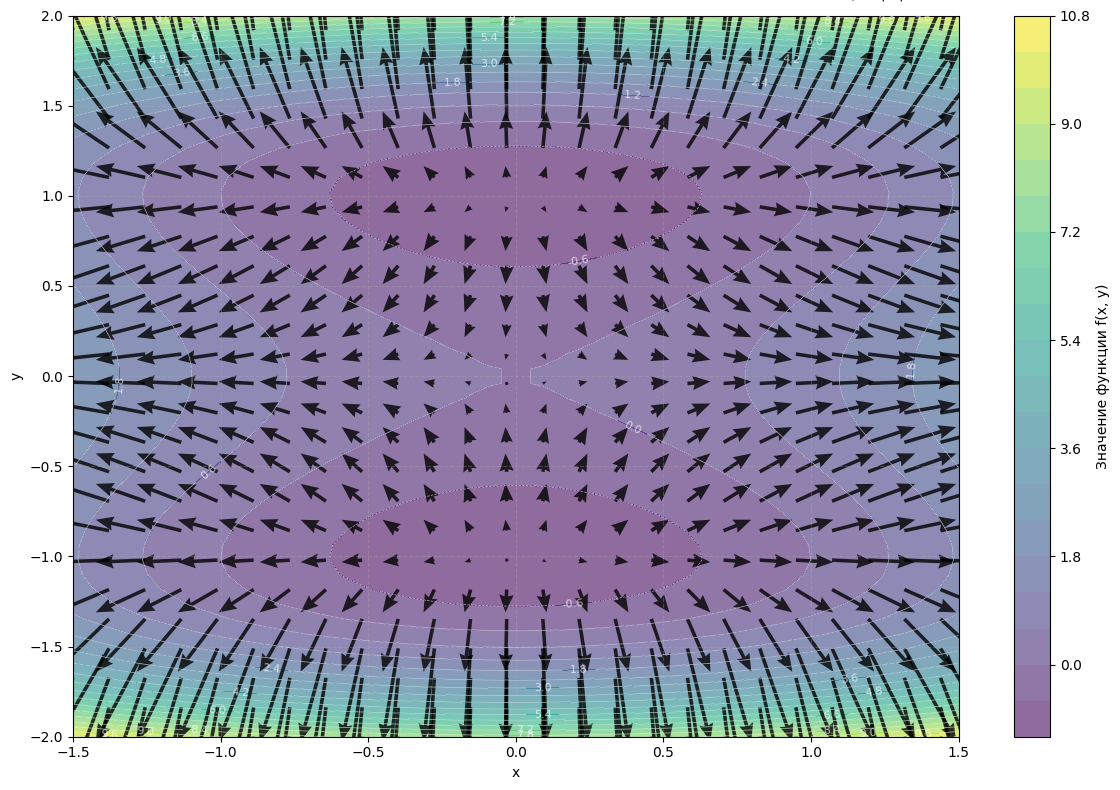

In [45]:
visualize_gradient_field(X, Y, Z, U, V)